In [514]:
import torch.nn as nn
import torch
from output.AE_UTKFace_1_00001_0_2.sourcecode.AEs import Autoencoder as AE01
from output.AE_UTKFace_1_1_0_2.sourcecode.AEs import Autoencoder as AE11
from matplotlib.pyplot import imshow
import numpy as np
import torchvision
from matplotlib.pyplot import subplots
#from output.AE_Cifar10_100_1_base_8x8.sourcecode.AEs import get_client_model

In [515]:
from output.AE_UTKFace_1_00001_0_2.sourcecode.main import apply_transform

In [516]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [517]:
#device = torch.device('cpu')

In [518]:
decoder01 = AE01(input_nc=64, output_nc=3).to(device)
#decoder01.eval()
decoder02 = AE11(input_nc=64, output_nc=3).to(device)
#decoder02.eval()

In [519]:
decoder01.load_state_dict(torch.load('./output/AE_UTKFace_1_00001_0_2/model.pt'))
decoder02.load_state_dict(torch.load('./output/AE_UTKFace_1_1_0_2/model.pt'))

<All keys matched successfully>

In [520]:
trainloader, testloader = apply_transform(64, "./data/noPeek/UTKFace_1.0_0.0001_0_2/input/",
                                          "./data/noPeek/UTKFace_1.0_0.0001_0_2/output")

['./data/noPeek/UTKFace_1.0_0.0001_0_2/input/1859.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/3800.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/4347.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/5095.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/4315.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/2009.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/4688.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/2436.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/2653.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/input/4468.npy']
['./data/noPeek/UTKFace_1.0_0.0001_0_2/output/1859.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/output/3800.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/output/4347.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/output/5095.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/output/4315.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/output/2009.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/output/4688.npy', './data/noPeek/UTKFace_1.0_0.0001_0_2/output/2436.npy', 

In [521]:
data_1 = next(iter(testloader))
d1, ir1 = data_1[0].type(torch.FloatTensor).to(device), data_1[1].type(torch.FloatTensor).to(device)
out_1 = decoder01(ir1)
out_2 = decoder02(ir1)

In [193]:
data_1 = next(iter(trainloader))
d1, ir1 = data_1[0].type(torch.FloatTensor).to(device), data_1[1].type(torch.FloatTensor).to(device)
out_1 = decoder01(ir1)
out_2 = decoder02(ir1)

In [26]:
out_0 = un_normalize(out_0)

In [231]:
import PIL
import matplotlib.pyplot as plt

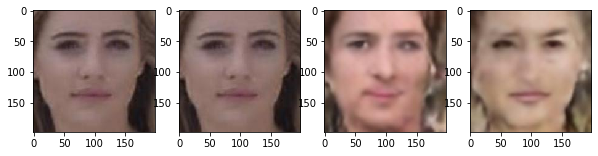

In [898]:
count = np.random.randint(low=0, high=553)
mode = "test"
dataset = "cifar10"#"UTKFace"
epoch = 149
inp_img_1 = PIL.Image.open('./output/AE-UTKFace-race-attribute-1000.0-0.1-begin/{}/{}/inp_{}.jpg'.format(mode, epoch, count))
inp_img_2 = PIL.Image.open('./output/AE_UTKFace_0_1_last/{}/{}/inp_{}.jpg'.format(mode, epoch, count))
#out_img_1 = PIL.Image.open('./output/AE_UTKFace_10_1_1_1/test/49/out_{}.jpg'.format(count))
out_img_2 = PIL.Image.open('./output/AE-UTKFace-1000.0-0.1-last/{}/{}/out_{}.jpg'.format(mode, epoch, count))
out_img_3 = PIL.Image.open('./output/AE-UTKFace-race-attribute-1000.0-0.1-begin/{}/{}/out_{}.jpg'.format(mode, epoch, count))

inp_img_1 = np.array(inp_img_1)
inp_img_2 = np.array(inp_img_2)
out_img_2 = np.array(out_img_2)
out_img_3 = np.array(out_img_3)

fig, axes = plt.subplots(1, 4, figsize=(10, 3))

axes[0].imshow(inp_img_1)
axes[1].imshow(inp_img_2)
#axes[1].imshow(inp_img_2)
axes[2].imshow(out_img_2)
axes[3].imshow(out_img_3)


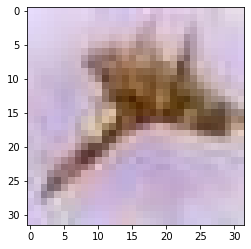

In [227]:
imshow(inp_img)

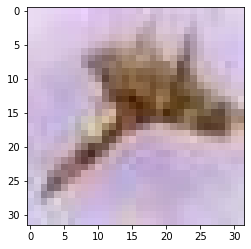

In [228]:
imshow(out_img_1)

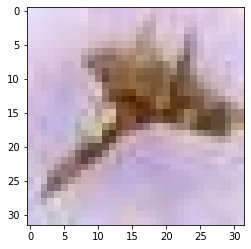

In [229]:
imshow(out_img_2)

# Without No-Peek

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


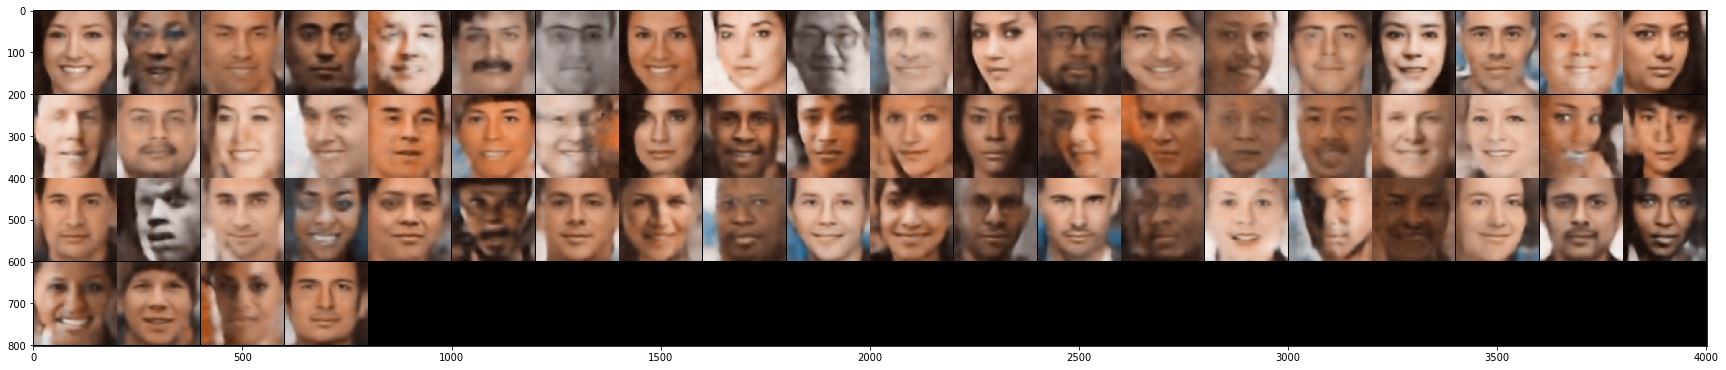

In [522]:
out0grid = torchvision.utils.make_grid(out_1, nrow=20)
fig, ax = subplots(figsize=(30, 20))
ax.imshow(out0grid.detach().permute(1, 2, 0).cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


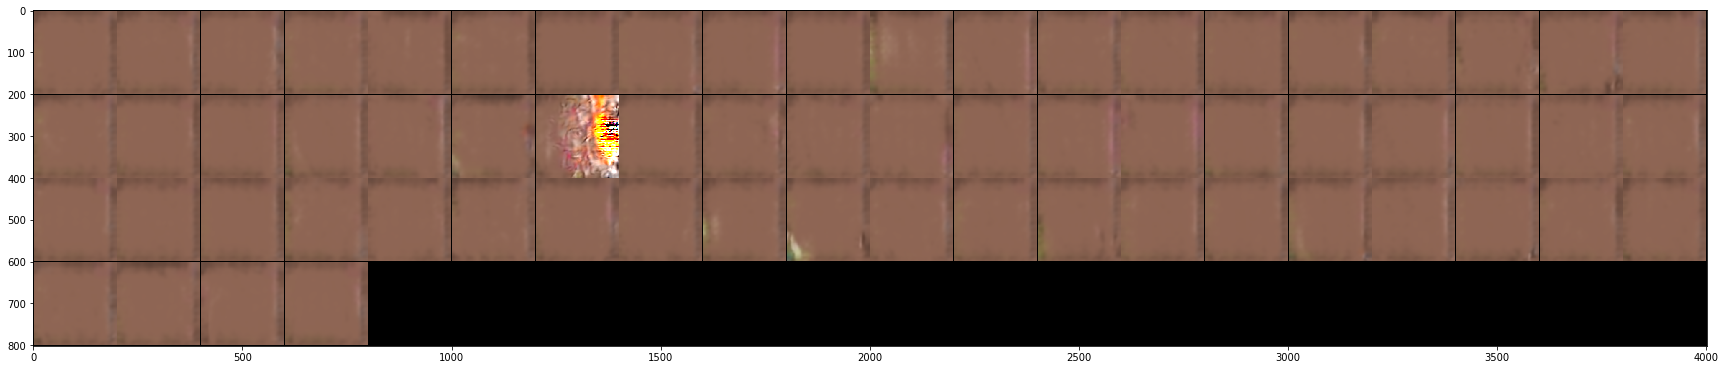

In [523]:
out0grid = torchvision.utils.make_grid(out_2, nrow=20)
fig, ax = subplots(figsize=(30, 20))
ax.imshow(out0grid.detach().permute(1, 2, 0).cpu())

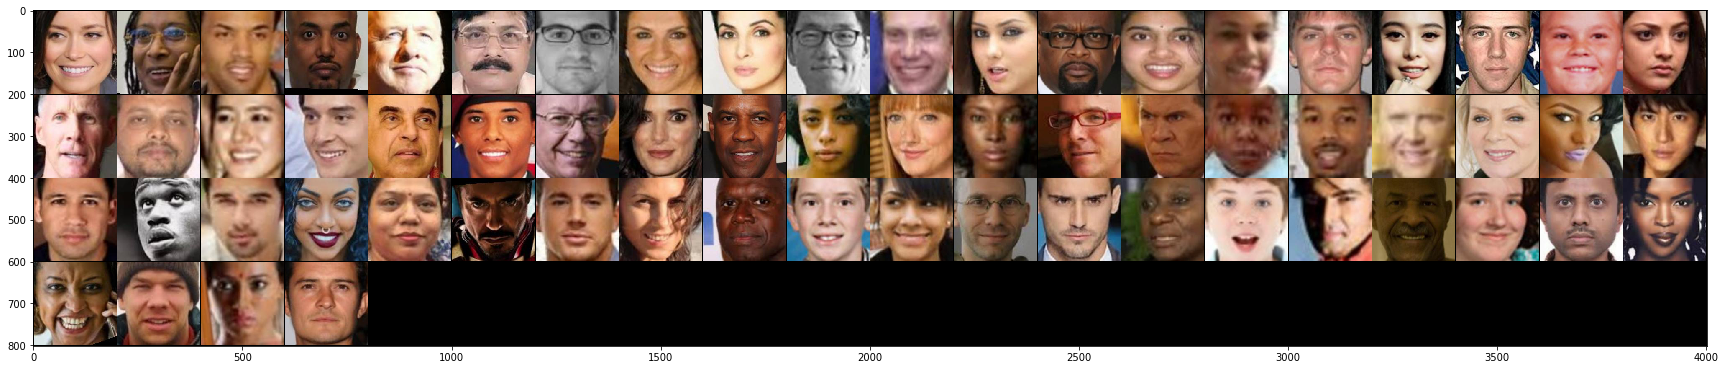

In [524]:
img0grid = torchvision.utils.make_grid(d1, nrow=20)
fig, ax = subplots(figsize=(30, 10))
ax.imshow(img0grid.detach().permute(1, 2, 0).cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


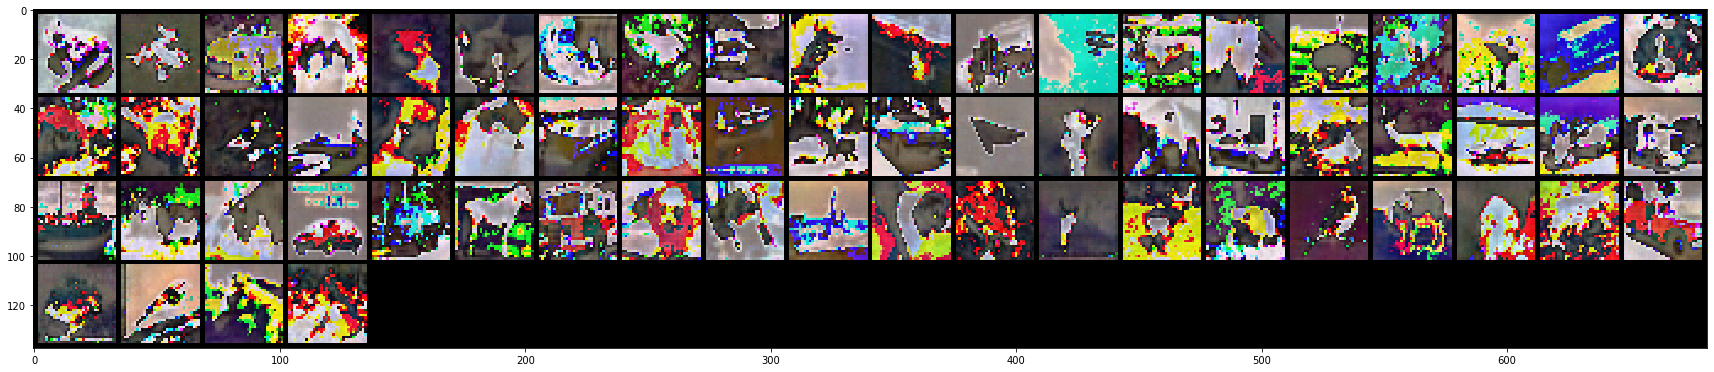

In [12]:
out1grid = torchvision.utils.make_grid(out_1, nrow=20)
fig, ax = subplots(figsize=(30, 20))
ax.imshow(out1grid.detach().permute(1, 2, 0).cpu())

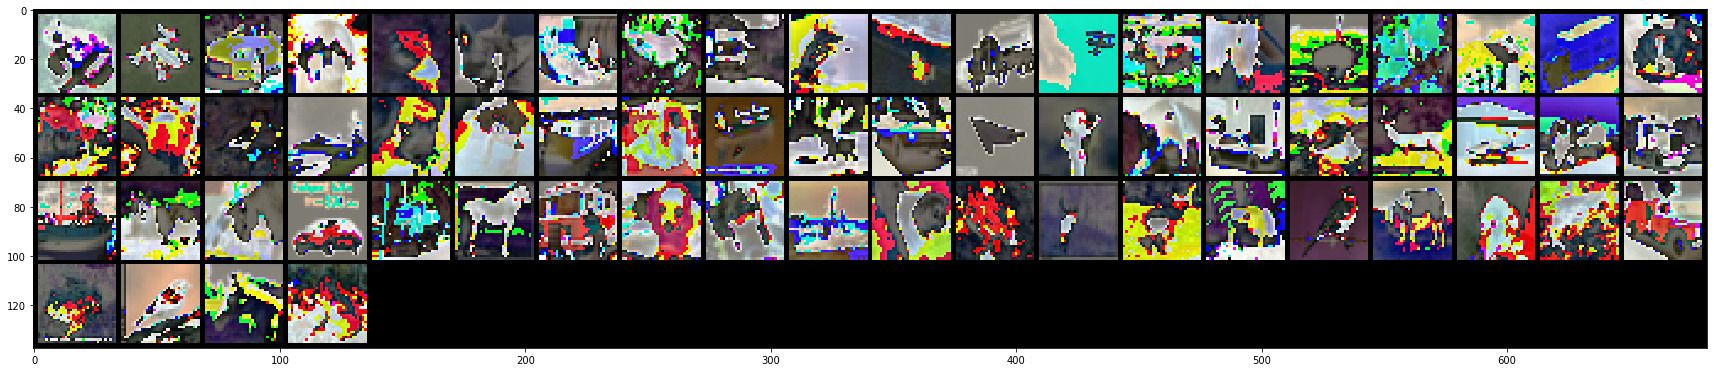

In [13]:
img1grid = torchvision.utils.make_grid(d1, nrow=20)
fig, ax = subplots(figsize=(30, 10))
ax.imshow(img1grid.detach().permute(1, 2, 0).cpu())

# With high cross entropy

In [14]:
decoder_2 = Autoencoder(input_nc=3, output_nc=3).to(device)
decoder_2.eval()

Autoencoder(
  (m): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), bias=False)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d

In [15]:
decoder_2.load_state_dict(torch.load('./output/AE-cifar10-2-0.3-early/model.pt'))

<All keys matched successfully>

In [16]:
trainloader, testloader = apply_transform(64, "./data/noPeek/2-0.3-cifar10-early/input/", "./data/noPeek/2-0.3-cifar10-early/output/")

['./data/noPeek/2-0.3-cifar10-early/input/1859.npy', './data/noPeek/2-0.3-cifar10-early/input/8500.npy', './data/noPeek/2-0.3-cifar10-early/input/9418.npy', './data/noPeek/2-0.3-cifar10-early/input/8144.npy', './data/noPeek/2-0.3-cifar10-early/input/3800.npy', './data/noPeek/2-0.3-cifar10-early/input/4347.npy', './data/noPeek/2-0.3-cifar10-early/input/5095.npy', './data/noPeek/2-0.3-cifar10-early/input/9741.npy', './data/noPeek/2-0.3-cifar10-early/input/8845.npy', './data/noPeek/2-0.3-cifar10-early/input/8986.npy']
['./data/noPeek/2-0.3-cifar10-early/output/1859.npy', './data/noPeek/2-0.3-cifar10-early/output/8500.npy', './data/noPeek/2-0.3-cifar10-early/output/9418.npy', './data/noPeek/2-0.3-cifar10-early/output/8144.npy', './data/noPeek/2-0.3-cifar10-early/output/3800.npy', './data/noPeek/2-0.3-cifar10-early/output/4347.npy', './data/noPeek/2-0.3-cifar10-early/output/5095.npy', './data/noPeek/2-0.3-cifar10-early/output/9741.npy', './data/noPeek/2-0.3-cifar10-early/output/8845.npy', '

In [17]:
data_1 = next(iter(testloader))
d1, ir1 = data_1[0].to(device), data_1[1].to(device)
#out1 = decoder(ir1)
out1 = decoder_2(ir1)

In [18]:
data_0 = next(iter(trainloader))
d0, ir0 = data_0[0].to(device), data_0[1].to(device)
out_0 = decoder_2(ir0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


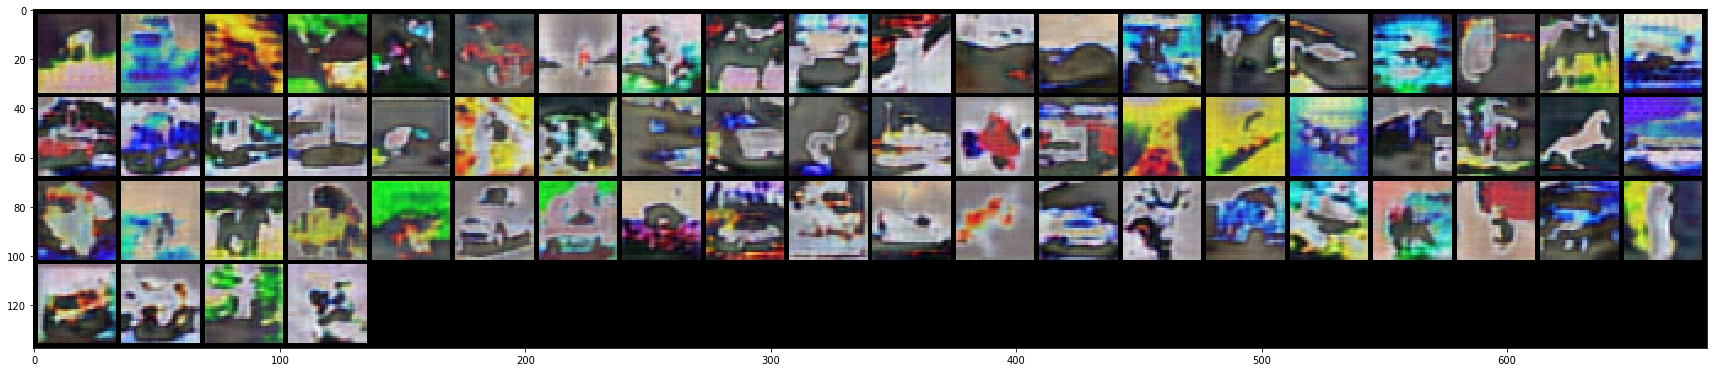

In [19]:
out0grid = torchvision.utils.make_grid(out_0, nrow=20)
fig, ax = subplots(figsize=(30, 20))
ax.imshow(out0grid.detach().permute(1, 2, 0).cpu())

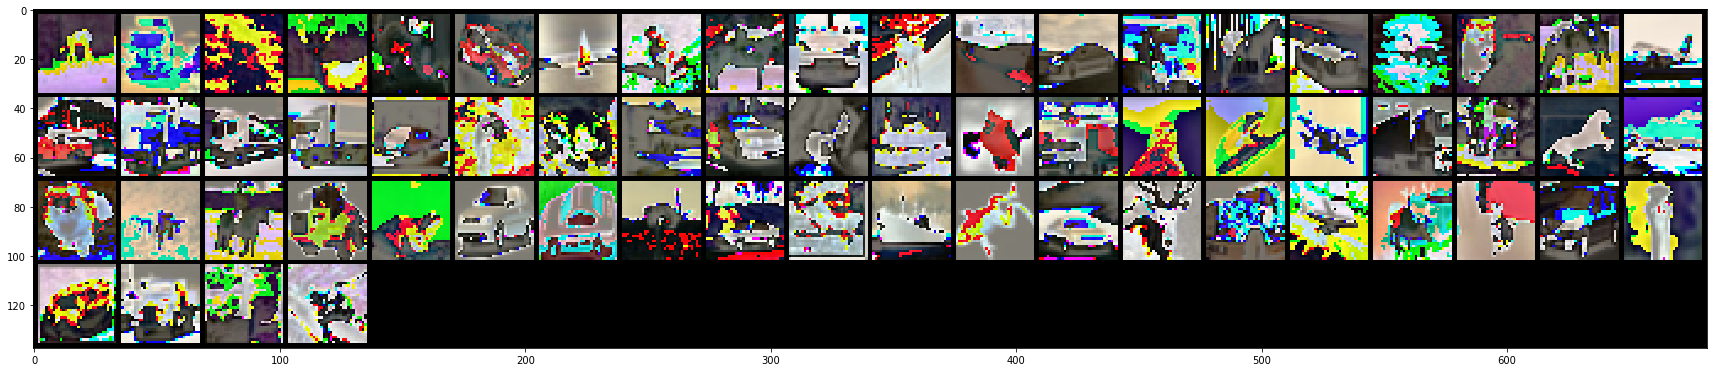

In [20]:
img0grid = torchvision.utils.make_grid(d0, nrow=20)
fig, ax = subplots(figsize=(30, 10))
ax.imshow(img0grid.detach().permute(1, 2, 0).cpu())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


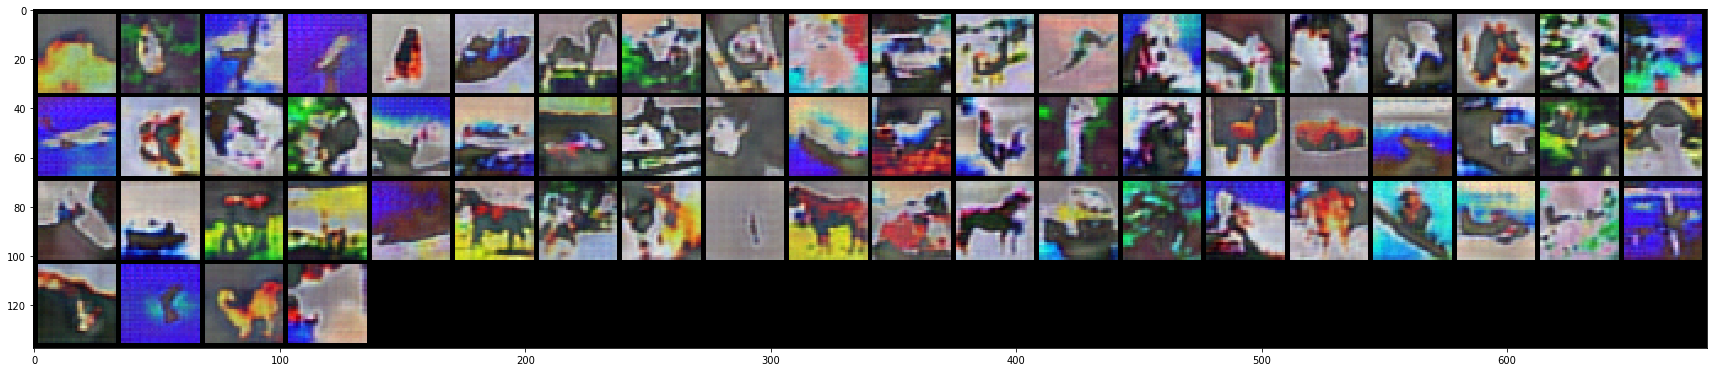

In [21]:
out1grid = torchvision.utils.make_grid(out1, nrow=20)
fig, ax = subplots(figsize=(30, 20))
ax.imshow(out1grid.detach().permute(1, 2, 0).cpu())

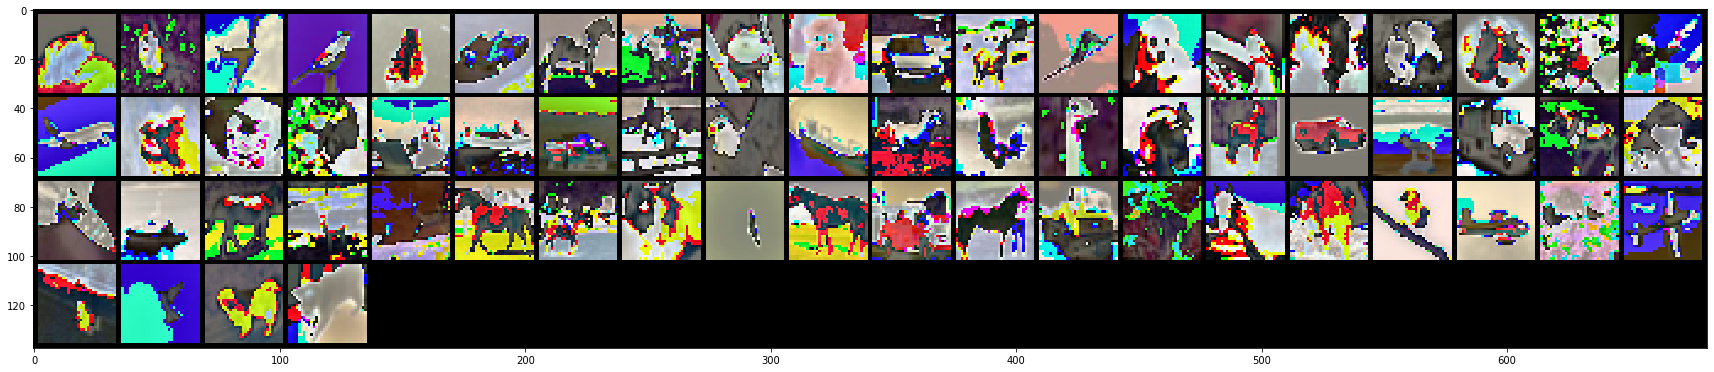

In [22]:
img1grid = torchvision.utils.make_grid(d1, nrow=20)
fig, ax = subplots(figsize=(30, 10))
ax.imshow(img1grid.detach().permute(1, 2, 0).cpu())

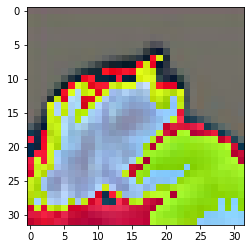

In [23]:
imshow(data_1[0][0].permute(1, 2, 0).cpu())

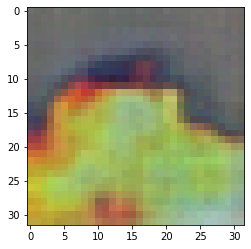

In [24]:
imshow(decoder_2(data_1[1].to(device))[0].permute(1, 2, 0).detach().cpu())

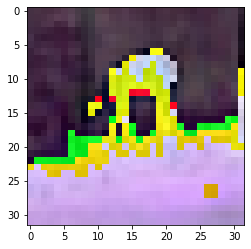

In [25]:
imshow(data_0[0][0].permute(1, 2, 0).cpu())

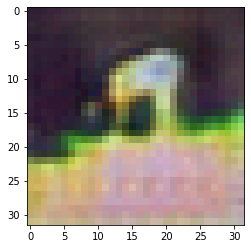

In [27]:
imshow(decoder_2(data_0[1].to(device))[0].permute(1, 2, 0).detach().cpu())